In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines){
    return false;
}

<IPython.core.display.Javascript object>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
from random import randrange

random.seed(1)
x_axis = np.arange(0, 29-1/288, 1/288).tolist()
np_cpu = np.load("wetransfer-2ee104//google-cpu-full.npy")

# full_cpu is a list of pandas series of the cpu utilisation of all machines
# just a lazy way of converting nd-arrays to pd-series
full_cpu = []
for x in range (0,len(np_cpu)):
    full_cpu.append(np_cpu[x])  
    
random_samples = [34, 150, 352, 365, 416, 464, 475, 501, 565, 1033, 1416, 1537, 1638, 1674, 1768, 1931, 1980, 2201, 
                  2682, 2834, 3045, 3110, 3439, 3548, 3584, 3632, 3748, 3782, 3818, 3977, 4179, 4363, 4655, 4747, 
                  4856, 4970, 5200, 5450, 5663, 6014, 6070, 6139, 6219, 6245, 6386, 6443, 6444, 6623, 6788, 6818, 
                  6915, 7090, 7174, 7191, 7297, 7364, 7530, 7737, 7868, 7993, 8023, 8117, 8123, 8181, 8205, 8278, 
                  8318, 8330, 8535, 8644, 8870, 8991, 9058, 9116, 9325, 9626, 9650, 9685, 9952, 10311, 10523, 10642,
                  10675, 10875, 10891, 10982, 11050, 11089, 11247, 11400, 11518, 11652, 11820, 11821, 11856, 11892,
                  12094, 12175, 12185, 12467]

In [23]:
def correlation_shift_with_window(timeseries1, timeseries2, window = 1):
    """Looks at how the spatial correlation between 2 timeseries change over time with a 1 day window
    
        window:
        max - uses the full length of the timeseries and performs LINEAR CORRELATION
        (integer) - performs linear correlation with a window of (integer) days
    """
    
    correlation_list = []
    if(window == "max"):
        for shift in range (0, (len(timeseries1) - 1)):
            df = pd.DataFrame({0: (timeseries1[shift:]), 1: (timeseries2[shift:])})
            correlation_list.append(df.corr()[0][1])
    
    elif(type(window) == int):
        for shift in range (0, (len(timeseries1) - window*288)):
            df = pd.DataFrame({0: (timeseries1[shift:(288*window + shift)]), 1: (timeseries2[shift:(288*window + shift)])})
            correlation_list.append(df.corr()[0][1])
        
    else:
        raise Exception("Window must be either 'max' or an integer")
        
    
    return correlation_list

In [24]:
trying = correlation_shift_with_window(full_cpu[0], full_cpu[1], window = "max")

In [73]:
def plot_max_vs_window(index1, index2, window = 1, output = False):
    window = correlation_shift_with_window(full_cpu[index1], full_cpu[index2], window = window)
    max_length = correlation_shift_with_window(full_cpu[index1], full_cpu[index2], window = "max")

    plt.figure(figsize=(15,5))
    plt.plot(x_axis[0:len(window)], window, label = "Window of " + str(window) + " day")
    plt.plot(x_axis[0:len(window)], max_length[0:len(window)], label = "Max Length")
    plt.minorticks_on()
    plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
    plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
    plt.title("Pearson's Correlation between Machine " + str(index1) + " and Machine " + str(index2))  
    plt.xlabel("Shift")  
    plt.ylabel("Coeficient of Correlation") 
    plt.show()
    
    if(output):
        return window, max_length

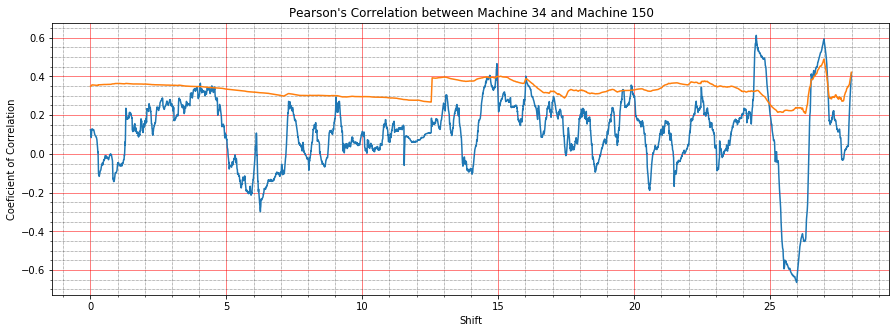

In [74]:
plot_max_vs_window(random_samples[0],random_samples[1])

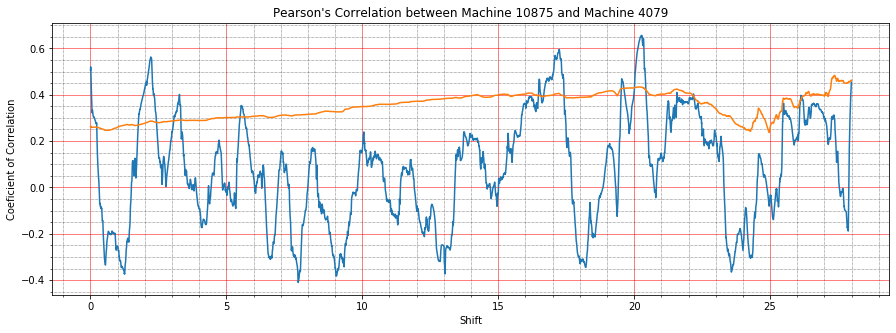

In [75]:
plot_max_vs_window(10875,4079)

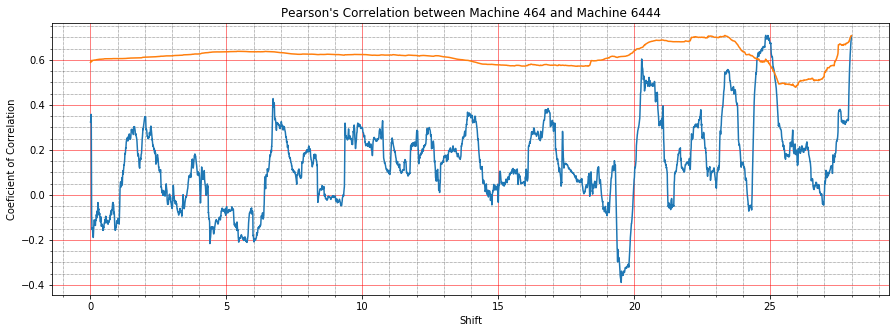

In [76]:
plot_max_vs_window(464,6444)

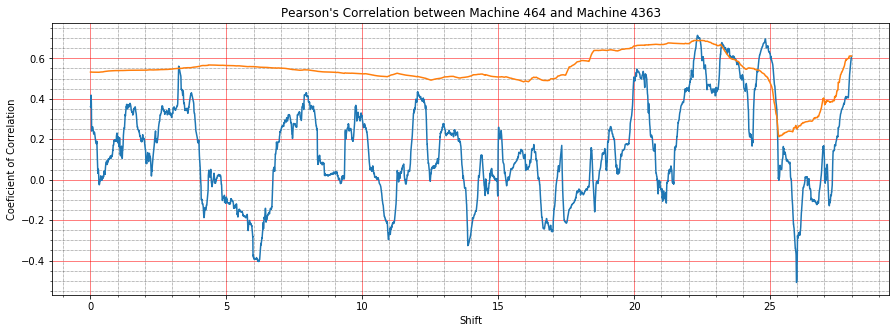

In [77]:
plot_max_vs_window(464,4363)

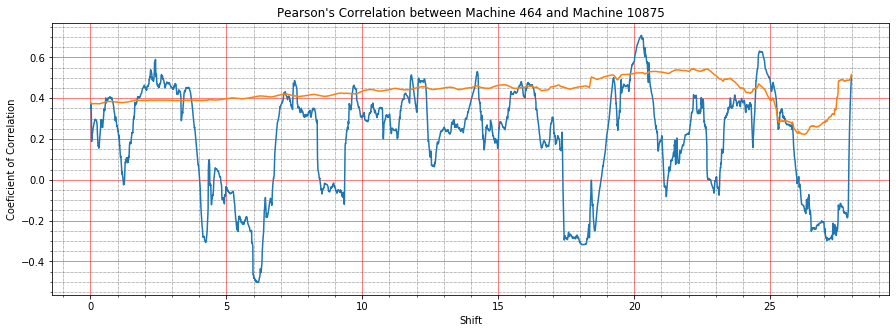

In [78]:
plot_max_vs_window(464,10875)

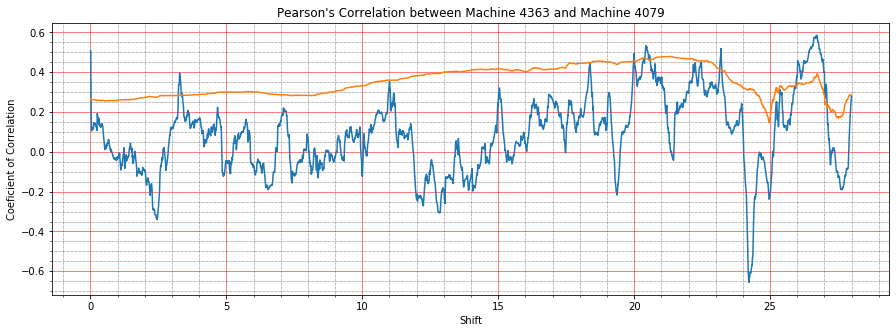

In [79]:
plot_max_vs_window(4363,4079)

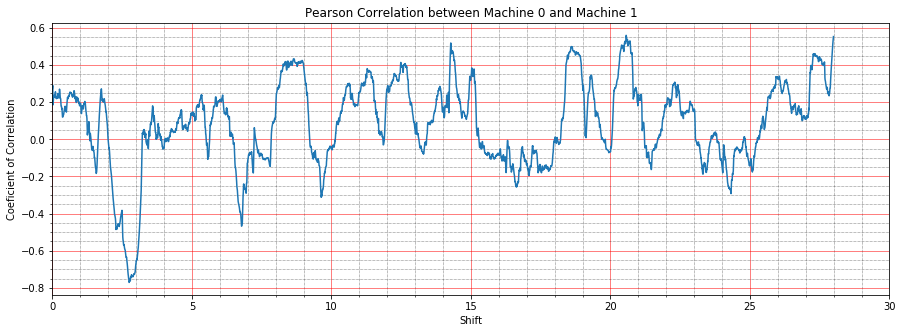

In [82]:
k = correlation_shift_with_window(full_cpu[0], full_cpu[1])
plt.figure(figsize=(15,5))
plt.plot(x_axis[0:len(k)], k, label = "Window of " + str(window) + " day")
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Pearson Correlation between Machine 0 and Machine 1")  
plt.xlabel("Shift")  
plt.ylabel("Coeficient of Correlation") 
plt.xlim((0, 30))
plt.savefig("Cross")
plt.show()

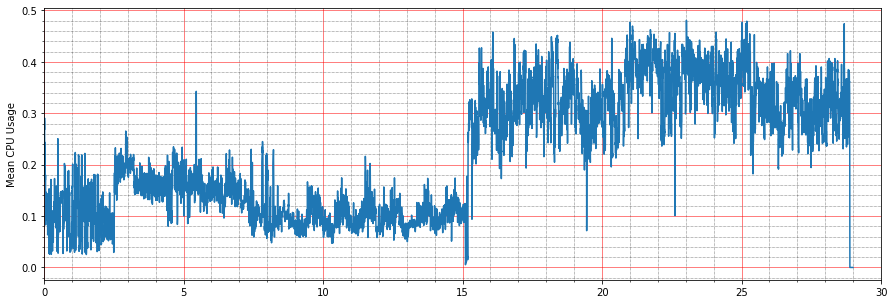

In [86]:
plt.figure(figsize=(15,5))
plt.plot(x_axis, full_cpu[0])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Mean CPU Usage") 
plt.xlim((0, 30))
plt.savefig("Machine0")
plt.show()

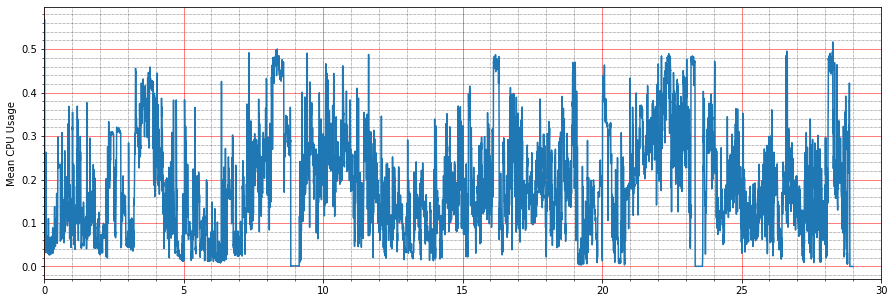

In [85]:
plt.figure(figsize=(15,5))
plt.plot(x_axis, full_cpu[1])
plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.ylabel("Mean CPU Usage") 
plt.xlim((0, 30))
plt.savefig("Machine1")
plt.show()

In [88]:
a = 5746

In [89]:
a

5746

In [90]:
a

5746